In [2]:
print("Hello World!")

Hello World!


## 1.1 Install dependencies


In [3]:
!conda install -c apple tensorflow-deps

Solving environment: done

# All requested packages already installed.



In [4]:
!python -m pip install tensorflow-macos tensorflow-metal opencv-python matplotlib

  Using cached opencv_python-4.7.0.72-cp37-abi3-macosx_11_0_arm64.whl (32.6 MB)


In [5]:
#upgrading the package
!pip install numpy --upgrade 
!pip install pandas --upgrade 
!pip install matplotlib --upgrade 
!pip install scikit-learn --upgrade 
!pip install scipy --upgrade
!pip install plotly --upgrade 

  Using cached numpy-1.24.2-cp310-cp310-macosx_11_0_arm64.whl (13.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tensorflow-macos 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.
  Using cached pandas-2.0.0-cp310-cp310-macosx_11_0_arm64.whl (10.8 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Using cached matplotlib-3.7.1-cp310-cp310-macosx_11_0_arm64.whl 

In [6]:
#print a list of the all the packages 
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakr

In [7]:
#import tensorflow
import tensorflow as tf
import os

In [8]:
#check for available GPUs
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1.2 Remove doggy images

Imcompatible images needs to be removed from the mass images obtained from the web


In [9]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [10]:
#set the image directory
data_dir = 'images_data'

#set the desired image extension
image_ext = ['jpeg','jpg','png','bmp']

In [11]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [13]:
#loops through the class of images
for image_class in os.listdir(data_dir):
    #loops through all the images in each class
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
            #os.remove(image_path)
                
            

## 1.3 Load the Data

In [14]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [15]:
#loading the data with keras utils
#it reshapes the images and puts them in batches (default batch size =32)
data = tf.keras.utils.image_dataset_from_directory('images_data') #this is still like an iterator

Found 313 files belonging to 2 classes.
Metal device set to: Apple M1


In [18]:
#convert the data into a numpy iterator
data_iterator = data.as_numpy_iterator()

In [19]:
#get a batch of images
batch = data_iterator.next()

In [20]:
batch[0][31, 0, 0,:]

array([49., 60., 78.], dtype=float32)

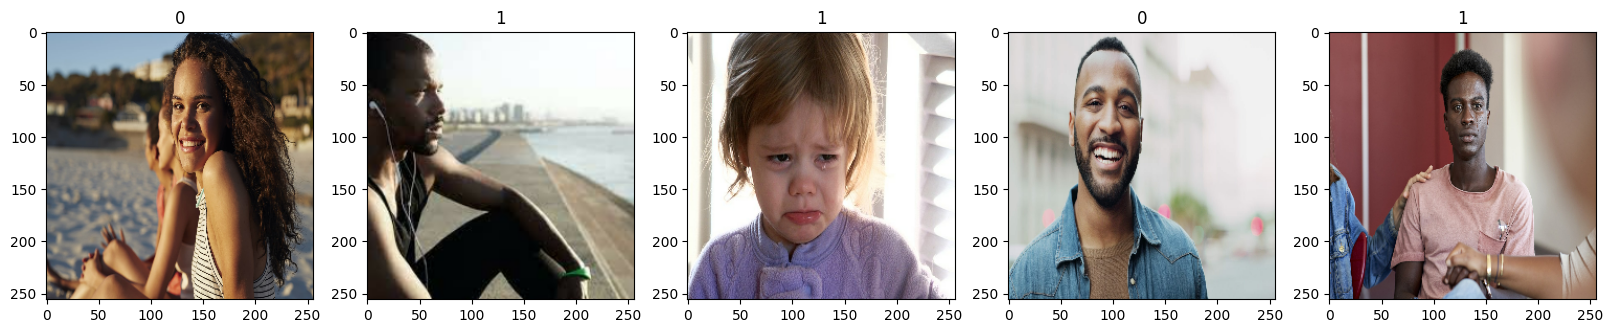

In [21]:
#plot sample images 
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2 Preprocess the data
### 2.1 Scale the Data

In [22]:
data = data.map(lambda x,y : (x/255,y))

In [23]:
batch = data.as_numpy_iterator().next()

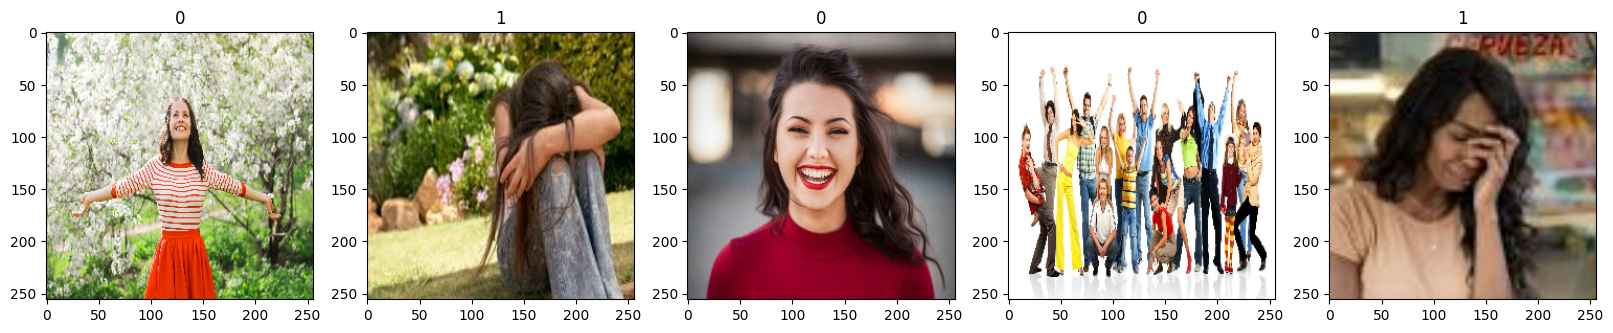

In [24]:
#plot sample images 
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split the data


In [25]:
#check the number of batches
data_length = len(data) 

In [26]:
train_size = int(data_length *.7)
val_size = int(data_length*.2)
test_size = int(data_length*.1)

In [27]:
assert train_size + val_size + test_size == data_length

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## 3. Deep Learning
### 3.1 Build the Deep Learning Model

In [30]:
#import the needed libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

In [31]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape =(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
#complile the model
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [34]:
logdir = 'logs'

In [35]:
#creating a tensorboard cLLback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
#train the model
history = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 398ms/step - loss: 0.8428 - accuracy: 0.4955 - val_loss: 0.7376 - val_accuracy: 0.4375
Epoch 2/20
7/7 [==============================] - 4s 409ms/step - loss: 0.6384 - accuracy: 0.6384 - val_loss: 0.5552 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 4s 435ms/step - loss: 0.5530 - accuracy: 0.7411 - val_loss: 0.4716 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 4s 451ms/step - loss: 0.4984 - accuracy: 0.7679 - val_loss: 0.4242 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 4s 446ms/step - loss: 0.4261 - accuracy: 0.8527 - val_loss: 0.3943 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 4s 477ms/step - loss: 0.3188 - accuracy: 0.8705 - val_loss: 0.3134 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 4s 455ms/step - loss: 0.1917 - accuracy: 0.9420 - val_loss: 0.2223 - val_accuracy: 0.9688
Epoch 8/20
7/7 [====

In [37]:
history.history

{'loss': [0.8428460955619812,
  0.6384168863296509,
  0.5529748797416687,
  0.49844563007354736,
  0.4261234402656555,
  0.31877386569976807,
  0.19166453182697296,
  0.16751937568187714,
  0.1551925539970398,
  0.10840092599391937,
  0.08160240948200226,
  0.047360025346279144,
  0.03844141960144043,
  0.037757471203804016,
  0.029163703322410583,
  0.020582322031259537,
  0.014315973967313766,
  0.01543046347796917,
  0.00908297672867775,
  0.0032157155219465494],
 'accuracy': [0.4955357313156128,
  0.6383928656578064,
  0.7410714626312256,
  0.7678571939468384,
  0.8526785969734192,
  0.8705357313156128,
  0.941964328289032,
  0.973214328289032,
  0.9330357313156128,
  0.973214328289032,
  0.9866071939468384,
  1.0,
  0.9910714626312256,
  0.9955357313156128,
  0.9955357313156128,
  0.9910714626312256,
  0.9910714626312256,
  0.9955357313156128,
  0.9955357313156128,
  1.0],
 'val_loss': [0.7375790476799011,
  0.555249810218811,
  0.471619188785553,
  0.42424920201301575,
  0.394343

### 3.3 Plot the Performance

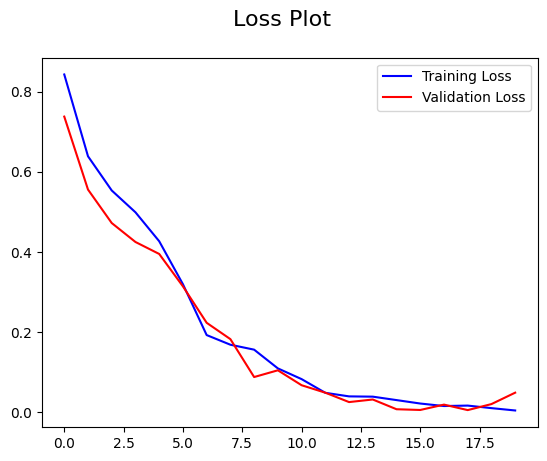

In [38]:
#plot the training loss and validation loss
fig = plt.figure()
plt.plot(history.history['loss'], color ='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color = 'red', label='Validation Loss')
plt.suptitle('Loss Plot', fontsize=16)
plt.legend()
plt.show()

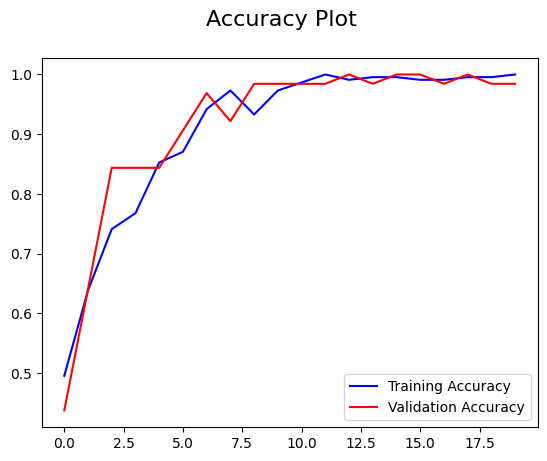

In [39]:
#plot the training accuracy and validation accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color ='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'red', label='Validation Accuracy')
plt.suptitle('Accuracy Plot', fontsize=16)
plt.legend()
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
#instantiating the metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    x, y = batch 
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 471ms/step


In [43]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


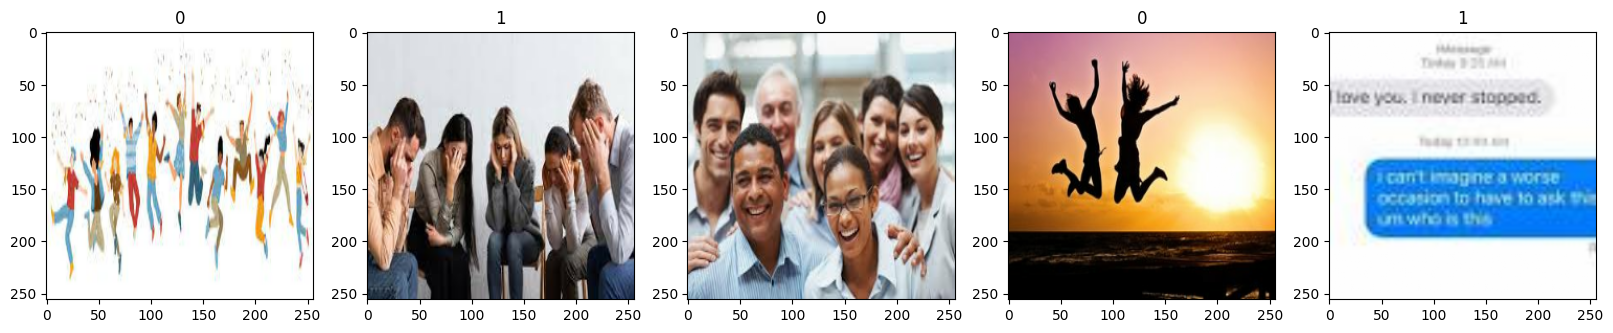

In [44]:
batch = test.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for i, image in enumerate(batch[0][:5]):
    ax[i].imshow(image)
    ax[i].title.set_text(batch[1][i])

### 4.2 Test

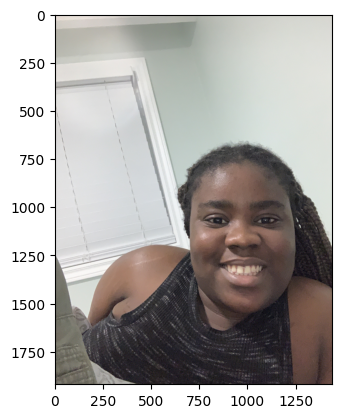

In [62]:
#load a random image not seen before by the classifer
img = cv2.imread('Image 3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

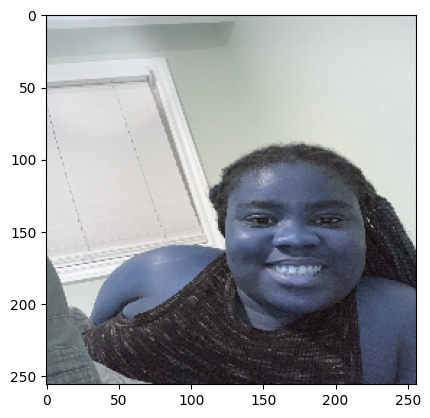

In [63]:
#preprocess the test data
img_resized = tf.image.resize(img, (256,256))
plt.imshow(img_resized.numpy().astype(int))

In [64]:
y_pred = model.predict(np.expand_dims(img_resized/255,0))

1/1 [==============================] - 0s 24ms/step


In [65]:
y_pred

array([[0.96229285]], dtype=float32)

In [66]:
if y_pred < 0.5:
    print('Predicted class is Happy!')
else: print('Predicted class is Sad')

Predicted class is Sad


## 5. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('happy_sad_imageclassificationmodel.h5')

In [ ]:
new_model = load_model('happy_sad_imageclassificationmodel.h5')

In [70]:
!pip install pipreqs



In [76]:
!pipreqs

Traceback (most recent call last):
  File "/Users/peter/anaconda3/bin/pipreqs", line 8, in <module>
    sys.exit(main())
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 528, in main
    init(args)
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 455, in init
    candidates = get_all_imports(input_path,
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 115, in get_all_imports
    contents = f.read()
  File "/Users/peter/anaconda3/lib/python3.10/codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 81: invalid start byte


In [72]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [80]:
!pipreqs --encoding utf-8

Traceback (most recent call last):
  File "/Users/peter/anaconda3/bin/pipreqs", line 8, in <module>
    sys.exit(main())
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 528, in main
    init(args)
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 455, in init
    candidates = get_all_imports(input_path,
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 115, in get_all_imports
    contents = f.read()
  File "/Users/peter/anaconda3/lib/python3.10/codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 81: invalid start byte


In [82]:
!pip3 freeze > requirements.txt

In [83]:
!python3 -m  pipreqs.pipreqs

Traceback (most recent call last):
  File "/Users/peter/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/peter/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 534, in <module>
    main()  # pragma: no cover
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 528, in main
    init(args)
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 455, in init
    candidates = get_all_imports(input_path,
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 115, in get_all_imports
    contents = f.read()
  File "/Users/peter/anaconda3/lib/python3.10/codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode

In [85]:
conda list -e > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [95]:
!pip list --format=freeze > requirements.txt

In [111]:
!pipreqs

UnicodeDecodeError reading /Users/peter/Library/CloudStorage/OneDrive-TrentUniversity/_My Projects/End_to End_Projects/Deep-Learning-Image-Classification/imageclassification/lib/python3.10/site-packages/IPython/core/tests/nonascii.py (couldn't read contents). Skipping.
UnicodeDecodeError reading /Users/peter/Library/CloudStorage/OneDrive-TrentUniversity/_My Projects/End_to End_Projects/Deep-Learning-Image-Classification/imageclassification/lib/python3.10/site-packages/joblib/test/test_func_inspect_special_encoding.py (couldn't read contents). Skipping.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of

In [109]:
!pipreqs --encoding = unicode_escape

Traceback (most recent call last):
  File "/Users/peter/anaconda3/bin/pipreqs", line 8, in <module>
    sys.exit(main())
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 528, in main
    init(args)
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 518, in init
    generate_requirements_file(path, imports, symbol)
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 157, in generate_requirements_file
    with _open(path, "w") as out_file:
  File "/Users/peter/anaconda3/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/Users/peter/anaconda3/lib/python3.10/site-packages/pipreqs/pipreqs.py", line 81, in _open
    file = open(filename, mode)
FileNotFoundError: [Errno 2] No such file or directory: 'unicode_escape/requirements.txt'
